# Experiment No. 6

### Name: Vivek Vitthal Avhad (4031)

In [1]:
# Import required libraries
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Activity imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from gensim.models import Word2Vec
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/bablu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Step 1: Sample Dataset
# ------------------------------
data = {
"text" : [
    "I love this movie, it was fantastic!" ,
    "This film was terrible and boring." ,
    "Amazing storyline and brilliant acting." ,
    "Worst experience ever, very disappointing." ,
    "The movie was okay, not too good, not too bad."
],
"label" : [ "positive" ,  "negative" ,  "positive" ,  "negative" ,  "neutral" ]
}
df = pd.DataFrame(data)

In [4]:
# ------------------------------
# Step 2: Text Preprocessing
# ------------------------------
def preprocess(text):
    text = text.lower() # Lowercasing
    text =  "".join([c for c in text if c not in string.punctuation]) # Remove punctuation
    words = [w for w in text.split() if w not in stop_words] # Remove stopwords
    return    "".join(words)

df[ "clean_text" ] = df[ "text" ].apply(preprocess)

print("Preprocessed Data:\n", df)

Preprocessed Data:
                                              text     label  \
0            I love this movie, it was fantastic!  positive   
1              This film was terrible and boring.  negative   
2         Amazing storyline and brilliant acting.  positive   
3      Worst experience ever, very disappointing.  negative   
4  The movie was okay, not too good, not too bad.   neutral   

                         clean_text  
0                lovemoviefantastic  
1                filmterribleboring  
2   amazingstorylinebrilliantacting  
3  worstexperienceeverdisappointing  
4                  movieokaygoodbad  


In [5]:
# ------------------------------
# Step 3: Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.3, random_state=42
)

In [6]:
# ------------------------------
# Step 4: Bag-of-Words (BoW)
# ------------------------------
count_vect = CountVectorizer()
X_train_bow = count_vect.fit_transform(X_train)
X_test_bow = count_vect.transform(X_test)

# Train Naive Bayes model
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

print("\nBag-of-Words Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))


Bag-of-Words Results:
Accuracy:  0.0
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/home/bablu/Bablu/Works/clgenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bablu/Bablu/Works/clgenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bablu/Bablu/Works/clgenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

In [7]:
# ------------------------------
# Step 5: TF-IDF
# ------------------------------
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Train Naive Bayes model
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print( "\nTF-IDF Results: ")
print("Accuracy:" , accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


TF-IDF Results: 
Accuracy: 0.0
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/home/bablu/Bablu/Works/clgenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bablu/Bablu/Works/clgenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/bablu/Bablu/Works/clgenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

## Student Activity:
1. Train sentiment analysis on a larger dataset (e.g., IMDB reviews or Twitter data).
2. Compare accuracy of different classifiers (Naive Bayes, Logistic Regression, SVM).
3. Apply Word2Vec embeddings for sentiment classification.
4. Visualize word importance using word clouds.
5. Prepare a confusion matrix for better error analysis

In [8]:
imdb_read = pd.read_csv("IMDB Dataset.csv")
imdb = imdb_read.sample(n=1000, random_state=42)


In [9]:
def preprocess_imdb(text):
    text = text.lower() # Lowercasing
    text =  "".join([c for c in text if c not in string.punctuation]) # Remove punctuation
    words = [w for w in text.split() if w not in stop_words] # Remove stopwords
    return " ".join(words)

imdb["clean_reviews"] = imdb["review"].apply(preprocess_imdb)

print("Preprocessed Data:\n", imdb[["review", "clean_reviews"]].head())

Preprocessed Data:
                                                   review  \
33553  I really liked this Summerslam due to the look...   
9427   Not many television shows appeal to quite as m...   
199    The film quickly gets to a major chase scene w...   
12447  Jane Austen would definitely approve of this o...   
39489  Expectations were somewhat high for me when I ...   

                                           clean_reviews  
33553  really liked summerslam due look arena curtain...  
9427   many television shows appeal quite many differ...  
199    film quickly gets major chase scene ever incre...  
12447  jane austen would definitely approve onebr br ...  
39489  expectations somewhat high went see movie thou...  


In [10]:
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(
    imdb["clean_reviews"], imdb["sentiment"], test_size=0.3, random_state=42
)

print(f"Training samples: {len(X_train_imdb)}")
print(f"Test samples: {len(X_test_imdb)}")

Training samples: 700
Test samples: 300


In [11]:
# Activity 2: Compare Multiple Classifiers
# ------------------------------

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_imdb)
X_test_tfidf = tfidf_vectorizer.transform(X_test_imdb)

# Train multiple classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

results = {}
# print(type(results))

print("\n" + "="*60)
print("CLASSIFIER COMPARISON")
print("="*60)

for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train_tfidf, y_train_imdb)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test_imdb, y_pred)
    results[name] = accuracy
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_imdb, y_pred))

# Compare results
print("\n" + "="*60)
print("ACCURACY COMPARISON")
print("="*60)
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


CLASSIFIER COMPARISON

Training Naive Bayes...

Naive Bayes Results:
Accuracy: 0.7633
              precision    recall  f1-score   support

    negative       0.71      0.94      0.81       157
    positive       0.89      0.57      0.70       143

    accuracy                           0.76       300
   macro avg       0.80      0.75      0.75       300
weighted avg       0.79      0.76      0.75       300


Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.8000
              precision    recall  f1-score   support

    negative       0.79      0.84      0.81       157
    positive       0.81      0.76      0.78       143

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300


Training SVM...

SVM Results:
Accuracy: 0.8000
              precision    recall  f1-score   support

    negative       0.81      0.80      0.81       157
    positive       0.7

In [12]:
# Activity 3: Word2Vec Embeddings
# ------------------------------

# Prepare tokenized sentences for Word2Vec
sentences = [text.split() for text in X_train_imdb]

# Train Word2Vec model
print("\nTraining Word2Vec model...")
w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, 
                     min_count=2, workers=4, epochs=10)

print(f"Vocabulary size: {len(w2v_model.wv)}")

# Function to convert text to Word2Vec features
def text_to_w2v(text, model):
    words = text.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

# Convert training and test data
print("Converting text to Word2Vec features...")
X_train_w2v = np.array([text_to_w2v(text, w2v_model) 
                        for text in X_train_imdb])
X_test_w2v = np.array([text_to_w2v(text, w2v_model) 
                       for text in X_test_imdb])

# Train classifier with Word2Vec features
print("\nTraining Logistic Regression with Word2Vec...")
clf_w2v = LogisticRegression(max_iter=1000, random_state=42)
clf_w2v.fit(X_train_w2v, y_train_imdb)
y_pred_w2v = clf_w2v.predict(X_test_w2v)

print("\nWord2Vec + Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test_imdb, y_pred_w2v):.4f}")
print(classification_report(y_test_imdb, y_pred_w2v))


Training Word2Vec model...
Vocabulary size: 7574
Converting text to Word2Vec features...

Training Logistic Regression with Word2Vec...

Word2Vec + Logistic Regression Results:
Accuracy: 0.5500
              precision    recall  f1-score   support

    negative       0.54      0.90      0.68       157
    positive       0.60      0.17      0.26       143

    accuracy                           0.55       300
   macro avg       0.57      0.53      0.47       300
weighted avg       0.57      0.55      0.48       300

Vocabulary size: 7574
Converting text to Word2Vec features...

Training Logistic Regression with Word2Vec...

Word2Vec + Logistic Regression Results:
Accuracy: 0.5500
              precision    recall  f1-score   support

    negative       0.54      0.90      0.68       157
    positive       0.60      0.17      0.26       143

    accuracy                           0.55       300
   macro avg       0.57      0.53      0.47       300
weighted avg       0.57      0.55      

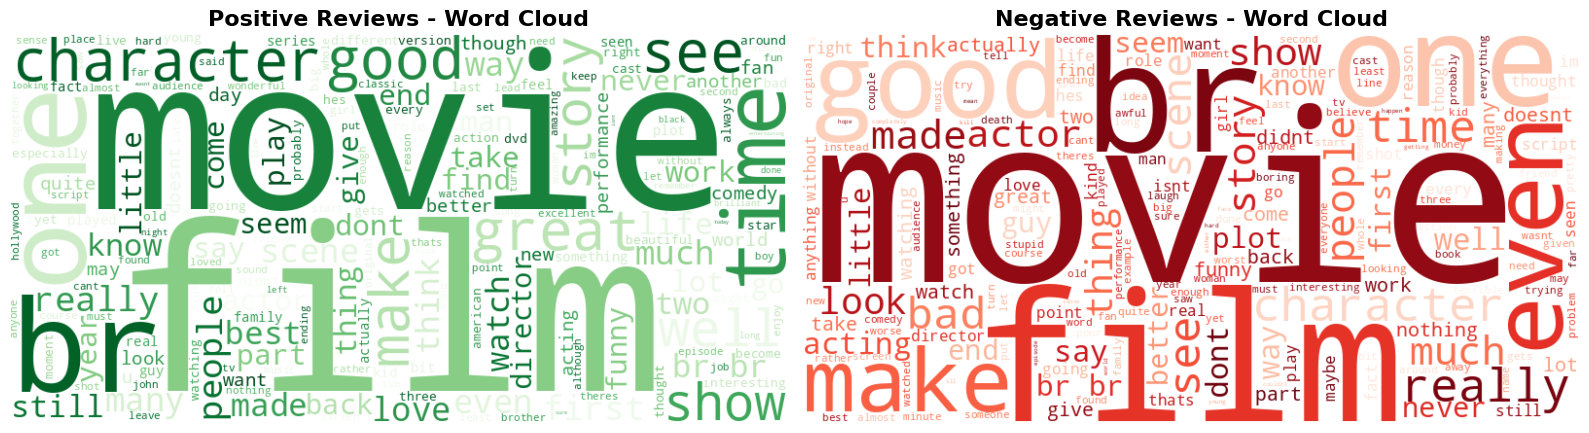

In [13]:
# Activity 4: Word Cloud Visualization
# ------------------------------


# Separate positive and negative reviews
positive_text = " ".join(imdb[imdb['sentiment'] == 'positive']['clean_reviews'])
negative_text = " ".join(imdb[imdb['sentiment'] == 'negative']['clean_reviews'])

# Create word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, 
                          background_color='white', 
                          colormap='Greens').generate(positive_text)
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Positive Reviews - Word Cloud', fontsize=16, fontweight='bold')
axes[0].axis('off')

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Negative Reviews - Word Cloud', fontsize=16, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

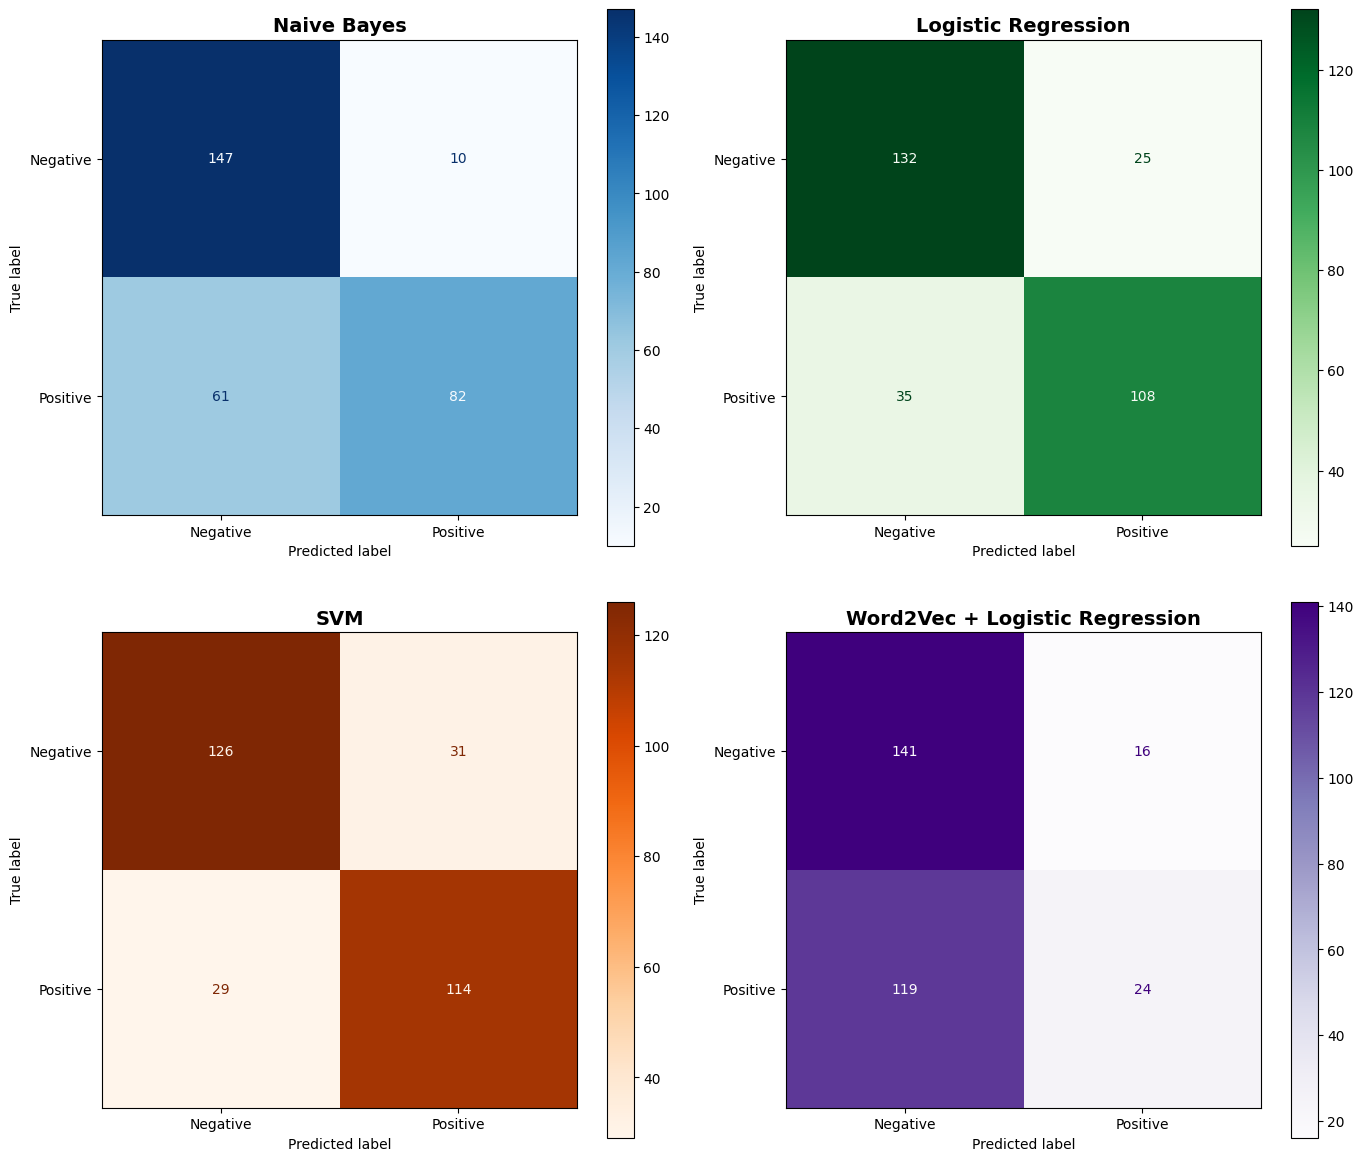


Confusion Matrix Analysis Complete!


In [14]:
# Activity 5: Confusion Matrix
# ------------------------------

# Create confusion matrices for all classifiers
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

# Confusion matrix for Naive Bayes
clf_nb = MultinomialNB()
clf_nb.fit(X_train_tfidf, y_train_imdb)
y_pred_nb = clf_nb.predict(X_test_tfidf)
cm_nb = confusion_matrix(y_test_imdb, y_pred_nb, labels=['negative', 'positive'])
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, 
                                  display_labels=['Negative', 'Positive'])
disp_nb.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Naive Bayes', fontsize=14, fontweight='bold')

# Confusion matrix for Logistic Regression
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train_tfidf, y_train_imdb)
y_pred_lr = clf_lr.predict(X_test_tfidf)
cm_lr = confusion_matrix(y_test_imdb, y_pred_lr, labels=['negative', 'positive'])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                                  display_labels=['Negative', 'Positive'])
disp_lr.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('Logistic Regression', fontsize=14, fontweight='bold')

# Confusion matrix for SVM
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_tfidf, y_train_imdb)
y_pred_svm = clf_svm.predict(X_test_tfidf)
cm_svm = confusion_matrix(y_test_imdb, y_pred_svm, labels=['negative', 'positive'])
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, 
                                   display_labels=['Negative', 'Positive'])
disp_svm.plot(ax=axes[2], cmap='Oranges', values_format='d')
axes[2].set_title('SVM', fontsize=14, fontweight='bold')

# Confusion matrix for Word2Vec + LR
cm_w2v = confusion_matrix(y_test_imdb, y_pred_w2v, labels=['negative', 'positive'])
disp_w2v = ConfusionMatrixDisplay(confusion_matrix=cm_w2v, 
                                   display_labels=['Negative', 'Positive'])
disp_w2v.plot(ax=axes[3], cmap='Purples', values_format='d')
axes[3].set_title('Word2Vec + Logistic Regression', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis Complete!")